<a href="https://colab.research.google.com/github/viveknittmca/Scaler/blob/main/DBSCAN_Hiearchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Clustering with outliers

## Dataset

In [ ]:
id = "1dr93lHQUchIii1lwsGoS40VcUj-rW4H1"
print("https://drive.google.com/uc?export=download&id=" + id)

https://drive.google.com/uc?export=download&id=1dr93lHQUchIii1lwsGoS40VcUj-rW4H1


In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1dr93lHQUchIii1lwsGoS40VcUj-rW4H1" -O wholesaledata.csv

--2022-06-08 12:37:53--  https://drive.google.com/uc?export=download&id=1dr93lHQUchIii1lwsGoS40VcUj-rW4H1
Resolving drive.google.com (drive.google.com)... 172.217.204.101, 172.217.204.138, 172.217.204.102, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kcah3v1ce9nue0jluupdahodsr1quj77/1654691850000/10804243441129704195/*/1dr93lHQUchIii1lwsGoS40VcUj-rW4H1?e=download [following]
--2022-06-08 12:37:54--  https://doc-04-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kcah3v1ce9nue0jluupdahodsr1quj77/1654691850000/10804243441129704195/*/1dr93lHQUchIii1lwsGoS40VcUj-rW4H1?e=download
Resolving doc-04-ag-docs.googleusercontent.com (doc-04-ag-docs.googleusercontent.com)... 142.250.97.132, 2607:f8b0:400c:c18::84
Connecting to doc-04-ag-docs.googleusercontent.com (doc-04-ag-

In [ ]:
df = pd.read_csv('./wholesaledata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
# Dropping categorical variables for simplicity

df.drop(["Channel", "Region"], axis = 1, inplace = True)

## Simple Visualization

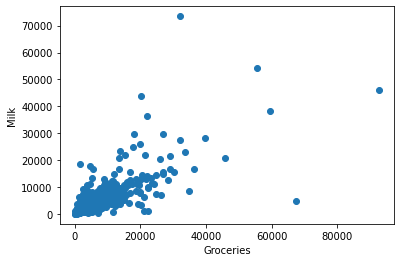

In [ ]:
# Let's plot two features data now
x = df['Grocery']
y = df['Milk']

plt.scatter(x,y)
plt.xlabel("Groceries")
plt.ylabel("Milk")
plt.show()

In [ ]:
## Outliers even in 2 features
## DBSCAN preferred over KMeans

##DBSCAN

In [ ]:
df = df[['Grocery', 'Milk']]
std_scaler = StandardScaler().fit(df)
std_df = std_scaler.transform(df)


In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(std_df)

In [ ]:
#"Noisy samples are given the label -1." --> Reference
labels = dbsc.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [ ]:
out_df = df.copy()
out_df['label'] = dbsc.labels_

In [ ]:
out_df['label'].value_counts()

 0    404
-1     36
Name: label, dtype: int64

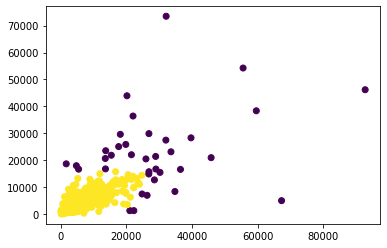

In [ ]:
plt.scatter(out_df['Grocery'], out_df['Milk'], c=out_df['label'])


##KMeans

In [ ]:
from sklearn.cluster import KMeans

k = 2 ## arbitrary value
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(std_df)

clusters = df.copy()
clusters['label'] = kmeans.labels_
clusters

,Grocery,Milk,label
0,7561,9656,1
1,9568,9810,1
2,7684,8808,1
3,4221,1196,1
4,7198,5410,1
...,...,...,...
435,16027,12051,1
436,764,1431,1
437,30243,15488,0
438,2232,1981,1


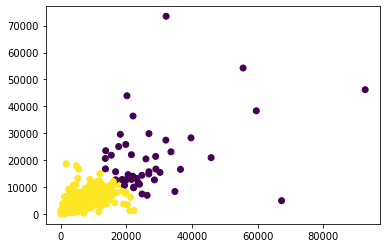

In [ ]:
plt.scatter(clusters['Grocery'], clusters['Milk'], c=clusters['label'])


# Finance Data clustering

## Dataset

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
id = "1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb"
print("https://drive.google.com/uc?export=download&id=" + id)

https://drive.google.com/uc?export=download&id=1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb


In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb" -O ind_nifty50list.csv

--2022-06-08 16:12:43--  https://drive.google.com/uc?export=download&id=1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb
Resolving drive.google.com (drive.google.com)... 142.250.101.101, 142.250.101.113, 142.250.101.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.101.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1r8ni5t7flekivdeujmj3ptkdbcc2dki/1654704750000/10306167880925931714/*/1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb?e=download [following]
--2022-06-08 16:12:44--  https://doc-08-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1r8ni5t7flekivdeujmj3ptkdbcc2dki/1654704750000/10306167880925931714/*/1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb?e=download
Resolving doc-08-64-docs.googleusercontent.com (doc-08-64-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to doc-08-64-docs.googleusercontent.com (doc-08-64

In [ ]:
stocks_df = pd.read_csv("./ind_nifty50list.csv")
list_of_symobols = list(stocks_df['Symbol'])
stocks_df.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010
4,Bajaj Finance Ltd.,FINANCIAL SERVICES,BAJFINANCE,EQ,INE296A01024


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.0 MB/s 
     |████████████████████████████████| 6.4 MB 7.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install fix-yahoo-finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
yf_symbols = list(map(lambda x: x + '.NS', list_of_symobols))
yf_symbols

['ADANIPORTS.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'HDFC.NS',
 'ICICIBANK.NS',
 'ITC.NS',
 'IOC.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'NESTLEIND.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBILIFE.NS',
 'SHREECEM.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'TITAN.NS',
 'UPL.NS',
 'ULTRACEMCO.NS',
 'WIPRO.NS']

In [ ]:
import yfinance as yf


stock_financials = {
    'marketCap': [],
    'regularMarketVolume': [],
    'earningsQuarterlyGrowth': [],
    'bookValue': [],
    'totalRevenue': [],
    'returnOnAssets': [],
    'profitMargins': [],
    'earningsGrowth': []
}

for ticker in yf_symbols:
    stock_info = yf.Ticker(ticker).info
    stock_financials['marketCap'].append(stock_info['marketCap'])
    stock_financials['regularMarketVolume'].append(stock_info['regularMarketVolume'])
    stock_financials['earningsQuarterlyGrowth'].append(stock_info['earningsQuarterlyGrowth'])
    stock_financials['bookValue'].append(stock_info['bookValue'])
    stock_financials['totalRevenue'].append(stock_info['totalRevenue'])
    stock_financials['returnOnAssets'].append(stock_info['returnOnAssets'])
    stock_financials['profitMargins'].append(stock_info['profitMargins'])
    stock_financials['earningsGrowth'].append(stock_info['earningsGrowth'])

In [ ]:
df = pd.DataFrame(stock_financials)
df.head

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth
0,1539072720896,2839851,-0.205,181.165,1.593403e+11,0.05149,0.29673,-0.235
1,2596018061312,1742929,-0.002,143.991,2.898187e+11,0.11496,0.10457,-0.002
2,2041133006848,9280420,0.502,385.482,4.375369e+11,0.01288,0.32270,0.498
3,1097901801472,346513,-0.016,1033.043,3.435395e+11,0.11259,0.17948,-0.015
4,3702931324928,1334050,0.797,724.657,1.708877e+11,0.03660,0.41128,0.793


In [ ]:
df.shape

(50, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   marketCap                50 non-null     int64  
 1   regularMarketVolume      50 non-null     int64  
 2   earningsQuarterlyGrowth  48 non-null     float64
 3   bookValue                49 non-null     float64
 4   totalRevenue             49 non-null     float64
 5   returnOnAssets           22 non-null     float64
 6   profitMargins            50 non-null     float64
 7   earningsGrowth           48 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 3.2 KB


In [ ]:
import yfinance as yf

stock_prices = yf.download(yf_symbols, start='2020-01-01')['Adj Close']
stock_prices.columns = list_of_symobols

[*********************100%***********************]  50 of 50 completed


In [ ]:
stock_prices.shape

(606, 50)

In [ ]:
stock_prices.head()

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,BRITANNIA,CIPLA,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,370.923370,1770.856567,748.700012,2913.946289,9370.917969,4214.786133,451.707916,401.235718,2883.703125,472.062744,...,422.185211,319.631714,184.449997,445.952484,2086.098145,705.708984,1143.308716,4032.545898,574.207214,243.721527
2020-01-02,376.325409,1768.338379,756.950012,2887.027588,9497.965820,4229.478516,453.601257,397.889709,2896.747559,469.682129,...,422.817139,319.138245,193.750000,462.255585,2076.521973,709.366699,1144.150269,4210.910156,581.235352,244.311905
2020-01-03,375.687012,1729.577393,742.950012,2841.747314,9338.342773,4177.084473,453.501617,394.584534,2882.896729,466.160767,...,432.197937,314.055328,191.100006,461.159210,2117.905029,717.747009,1128.407837,4185.514648,576.647583,247.066925
2020-01-06,373.427948,1685.878662,723.250000,2809.926270,9035.437500,3981.102051,448.070740,382.873474,2867.005859,462.986542,...,427.677643,308.034790,185.649994,451.196167,2117.712646,713.394836,1147.120728,4123.910645,570.986023,248.100067
2020-01-07,377.946014,1702.913940,725.750000,2810.203613,9088.344727,3992.009277,443.536713,376.222260,2880.809570,464.821655,...,433.947693,310.798309,184.699997,453.913361,2122.909668,719.598999,1148.457275,4208.231934,580.844910,251.101074


In [ ]:
##2020 returns
price_2020 = stock_prices.loc["2020-01-02 00:00:00":"2020-12-31 00:00:00"]
stock_prices.loc['returns_2020'] = (price_2020.loc['2020-12-31 00:00:00'] / price_2020.loc['2020-01-02 00:00:00'] - 1)*100

stock_prices

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,BRITANNIA,CIPLA,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,370.923370,1770.856567,748.700012,2913.946289,9370.917969,4214.786133,451.707916,401.235718,2883.703125,472.062744,...,422.185211,319.631714,184.449997,445.952484,2086.098145,705.708984,1143.308716,4032.545898,574.207214,243.721527
2020-01-02 00:00:00,376.325409,1768.338379,756.950012,2887.027588,9497.965820,4229.478516,453.601257,397.889709,2896.747559,469.682129,...,422.817139,319.138245,193.750000,462.255585,2076.521973,709.366699,1144.150269,4210.910156,581.235352,244.311905
2020-01-03 00:00:00,375.687012,1729.577393,742.950012,2841.747314,9338.342773,4177.084473,453.501617,394.584534,2882.896729,466.160767,...,432.197937,314.055328,191.100006,461.159210,2117.905029,717.747009,1128.407837,4185.514648,576.647583,247.066925
2020-01-06 00:00:00,373.427948,1685.878662,723.250000,2809.926270,9035.437500,3981.102051,448.070740,382.873474,2867.005859,462.986542,...,427.677643,308.034790,185.649994,451.196167,2117.712646,713.394836,1147.120728,4123.910645,570.986023,248.100067
2020-01-07 00:00:00,377.946014,1702.913940,725.750000,2810.203613,9088.344727,3992.009277,443.536713,376.222260,2880.809570,464.821655,...,433.947693,310.798309,184.699997,453.913361,2122.909668,719.598999,1148.457275,4208.231934,580.844910,251.101074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-03 00:00:00,739.900024,2886.899902,677.299988,3672.699951,12691.599609,6028.200195,686.500000,328.149994,3530.000000,960.950012,...,865.099976,753.900024,431.899994,1067.300049,3440.149902,1147.900024,2204.399902,5678.850098,769.650024,475.500000
2022-06-06 00:00:00,741.250000,2817.449951,672.200012,3817.000000,12516.400391,6021.000000,682.950012,319.350006,3491.949951,976.049988,...,859.799988,763.650024,432.350006,1078.099976,3430.949951,1144.199951,2198.550049,5581.350098,779.000000,473.200012
2022-06-07 00:00:00,734.549988,2744.699951,665.849976,3834.100098,12338.700195,5878.600098,685.299988,320.250000,3383.449951,972.750000,...,848.250000,756.599976,435.850006,1068.500000,3362.699951,1130.300049,2100.800049,5555.200195,746.200012,467.649994


In [ ]:
stock_prices = stock_prices.transpose()
stock_prices.head()

Date,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,...,2022-05-27 00:00:00,2022-05-30 00:00:00,2022-05-31 00:00:00,2022-06-01 00:00:00,2022-06-02 00:00:00,2022-06-03 00:00:00,2022-06-06 00:00:00,2022-06-07 00:00:00,2022-06-08 00:00:00,returns_2020
ADANIPORTS,370.923370,376.325409,375.687012,373.427948,377.946014,378.780884,384.821320,385.066895,383.397186,382.267670,...,703.099976,734.700012,739.849976,736.900024,748.450012,739.900024,741.250000,734.549988,728.599976,27.651373
ASIANPAINT,1770.856567,1768.338379,1729.577393,1685.878662,1702.913940,1707.259033,1750.463989,1770.214844,1782.410889,1796.483276,...,2834.850098,2844.000000,2859.649902,2852.500000,2908.550049,2886.899902,2817.449951,2744.699951,2705.199951,55.379620
AXISBANK,748.700012,756.950012,742.950012,723.250000,725.750000,724.500000,742.849976,740.049988,737.400024,747.900024,...,688.299988,693.650024,685.200012,686.049988,691.549988,677.299988,672.200012,665.849976,658.599976,-18.032895
BAJAJ-AUTO,2913.946289,2887.027588,2841.747314,2809.926270,2810.203613,2829.906738,2854.373779,2868.711914,2862.097900,2869.082031,...,3833.050049,3856.699951,3864.100098,3720.100098,3688.699951,3672.699951,3817.000000,3834.100098,3794.149902,15.306363
BAJFINANCE,9370.917969,9497.965820,9338.342773,9035.437500,9088.344727,9138.154297,9387.704102,9364.722656,9447.655273,9547.175781,...,12758.400391,12924.049805,12934.000000,12596.599609,12936.000000,12691.599609,12516.400391,12338.700195,12465.000000,-6.251606


In [ ]:
prices = stock_prices.iloc[:, -1]
df.index = stock_prices.index
df['return_2020'] = prices
df.head()

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth,return_2020
ADANIPORTS,1539072720896,2839851,-0.205,181.165,1.593403e+11,0.05149,0.29673,-0.235,27.651373
ASIANPAINT,2596018061312,1742929,-0.002,143.991,2.898187e+11,0.11496,0.10457,-0.002,55.379620
AXISBANK,2041133006848,9280420,0.502,385.482,4.375369e+11,0.01288,0.32270,0.498,-18.032895
BAJAJ-AUTO,1097901801472,346513,-0.016,1033.043,3.435395e+11,0.11259,0.17948,-0.015,15.306363
BAJFINANCE,3702931324928,1334050,0.797,724.657,1.708877e+11,0.03660,0.41128,0.793,-6.251606


In [ ]:
# drop null values
df.isna().sum()

marketCap                   0
regularMarketVolume         0
earningsQuarterlyGrowth     2
bookValue                   1
totalRevenue                1
returnOnAssets             28
profitMargins               0
earningsGrowth              2
return_2020                 0
dtype: int64

In [ ]:
df['returnOnAssets'] = df['returnOnAssets'].replace(np.nan, 0)

In [ ]:
df.isna().sum()

marketCap                  0
regularMarketVolume        0
earningsQuarterlyGrowth    2
bookValue                  1
totalRevenue               1
returnOnAssets             0
profitMargins              0
earningsGrowth             2
return_2020                0
dtype: int64

In [ ]:
df.dropna(axis=0, inplace=True)
df.shape

(47, 9)

## Hiearchical Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

In [ ]:
scaled_df = pd.DataFrame(X, columns=df.columns, index=df.index)


In [ ]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch

# Refer https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
Z = sch.linkage(scaled_df, method='ward') #linkage = ward


In [ ]:
Z.shape

(46, 4)

Text(0, 0.5, 'distance')

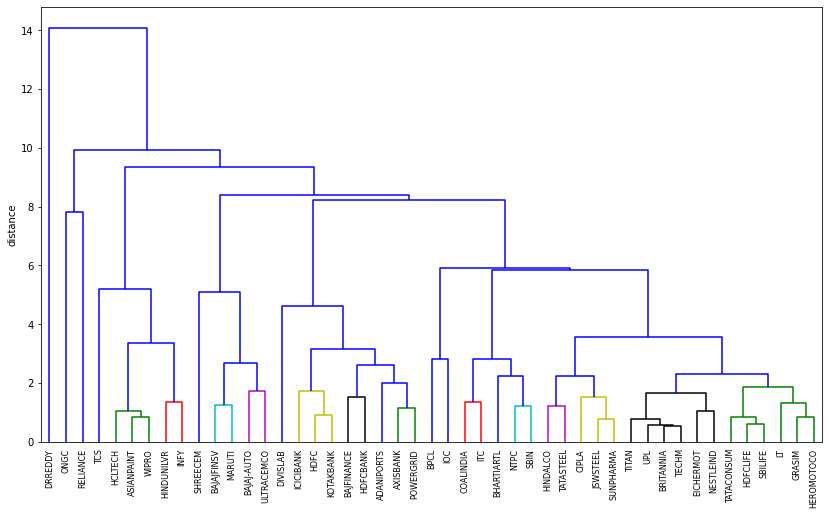

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
sch.dendrogram(Z, labels=scaled_df.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

In [ ]:
# import hierarchical clustering libraries
from sklearn.cluster import AgglomerativeClustering


# create clusters
hc_2020 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

y_pred = hc_2020.fit_predict(scaled_df)

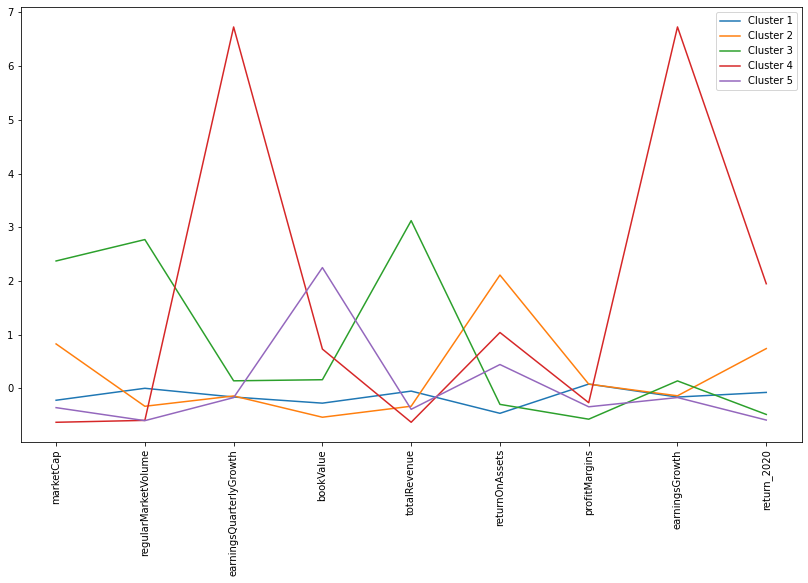

In [ ]:
#Plot a line graph to see the characteristics of the clusters
scaled_df['label'] = pd.Series(y_pred, index=scaled_df.index)

clustered_df = scaled_df.groupby('label').mean()

labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

plt.figure(figsize=(14,8))
plt.plot(clustered_df.T, label=labels)
plt.xticks(rotation=90)
plt.legend(labels)